Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.2796 - loss: 1.9914 - val_accuracy: 0.3770 - val_loss: 1.7463
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.3908 - loss: 1.7000 - val_accuracy: 0.4008 - val_loss: 1.6749
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4276 - loss: 1.6081 - val_accuracy: 0.4566 - val_loss: 1.5343
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4529 - loss: 1.5434 - val_accuracy: 0.4269 - val_loss: 1.5807
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4713 - loss: 1.4857 - val_accuracy: 0.4721 - val_loss: 1.4744
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4742 - loss: 1.4700
Test accuracy: 0.4721


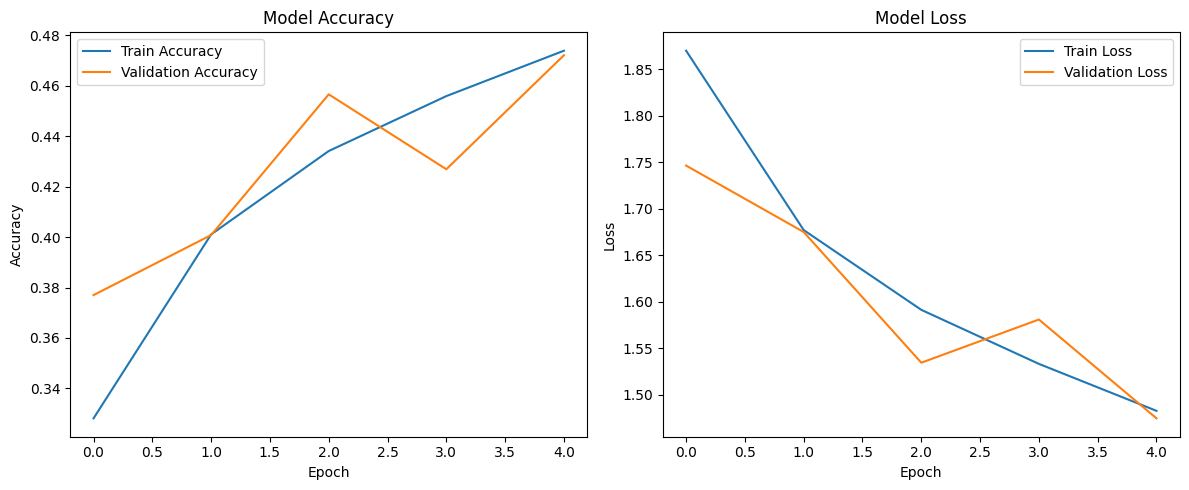

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


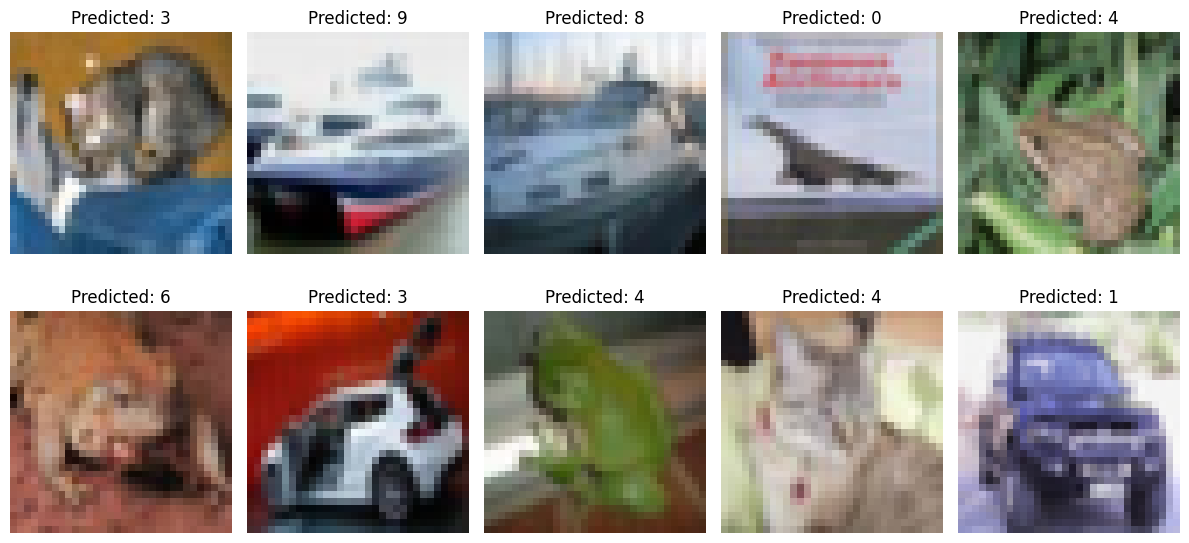

In [6]:
# a. Import the necessary packages
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# b. Load the training and testing data
# CIFAR-10 dataset contains 60,000 32x32 color images in 10 classes
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten the images to feed into the fully connected network
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))

# c. Define the network architecture using Keras
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(train_images.shape[1],)),  # Input layer
    layers.Dense(256, activation='relu'),  # Hidden layer
    layers.Dense(128, activation='relu'),  # Hidden layer
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model using SGD optimizer and sparse categorical crossentropy loss
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# d. Train the model using SGD
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

# e. Evaluate the network
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

# f. Plot the training loss and accuracy
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# g. Make predictions on the test images
predictions = model.predict(test_images)

# h. Display the first 10 images along with predicted labels
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    # Reshape each flattened image back to 32x32x3 for display
    plt.imshow(test_images[i].reshape(32, 32, 3))
    plt.title(f"Predicted: {predictions[i].argmax()}")
    plt.axis('off')
plt.tight_layout()
plt.show()
